In [26]:
# Jupyter Notebook: Iris Dataset Analysis

# Cell 1: Import necessary Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Descriptions:
# - pandas: Provides data structures and data analysis tools.
# - numpy: Supports large arrays and matrices, along with mathematical functions.
# - matplotlib: Used for creating static, animated, and interactive visualizations.
# - seaborn: Provides a high-level interface for drawing attractive statistical graphics.
# - sklearn.preprocessing.StandardScaler: Used for standardizing features.


In [27]:

# Cell 2: Load the dataset into a pandas DataFrame
df=pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


(a) Examining a few rows 

In [28]:
print("First few rows of the dataset:")
print(df.head(4))

First few rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa


The structure of the dataset

In [29]:
print("\nStructure of the dataset:")
print(df.info())


Structure of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [ ]:
(b) Displaying the summary statistics,

In [30]:
print("\nSummary statistics of the dataset:")
print(df.describe())


Summary statistics of the dataset:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


(c) Determining the column names and the data types of the variables

In [31]:
print("\nColumn names and data types:")
print(df.dtypes)


Column names and data types:
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


(4) Check and deal with the missing values in the dataset.

In [32]:
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


(5) Checking and handling outliers. Identify and decide on a method to handle 
outliers (discuss the options).


Boxplot analysis for outliers:


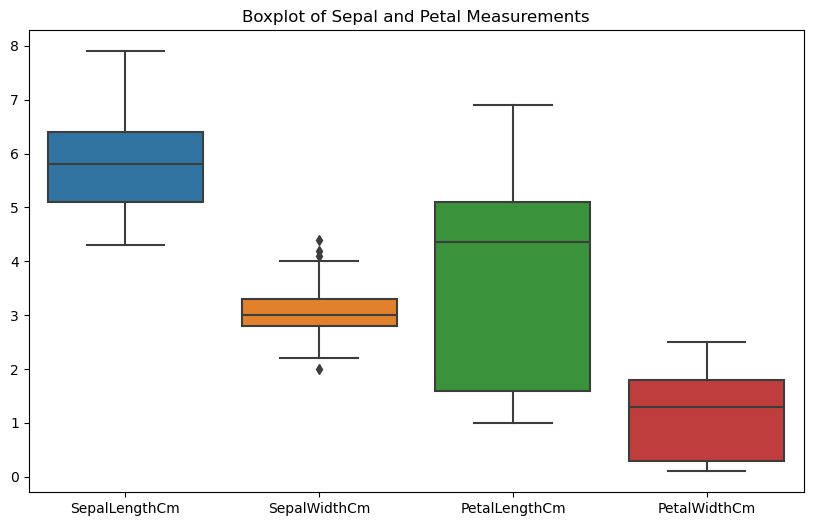

In [33]:
# Identify outliers using boxplots
print("\nBoxplot analysis for outliers:")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
plt.title('Boxplot of Sepal and Petal Measurements')
plt.show()

In [34]:
# Handling outliers by using IQR method
Q1 = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].quantile(0.25)
Q3 = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].quantile(0.75)
IQR = Q3 - Q1


In [35]:
# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [36]:
# Remove outliers
filtered_df = df[~((df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] < lower_bound) | (df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] > upper_bound)).any(axis=1)]
print("\nDataset shape after removing outliers:")
print(filtered_df.shape)



Dataset shape after removing outliers:
(146, 6)


(6) Select the most relevant features and apply the necessary feature 
transformations. Discuss the available techniques and justify the choice of a 
technique

In [37]:
selected_features = filtered_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)
print("\nScaled features:")
print(scaled_features[:5])




Scaled features:
[[-0.9105154   1.1757891  -1.3748782  -1.34589856]
 [-1.15112218 -0.09392398 -1.3748782  -1.34589856]
 [-1.39172896  0.41396125 -1.43198551 -1.34589856]
 [-1.51203236  0.16001863 -1.31777088 -1.34589856]
 [-1.03081879  1.42973171 -1.3748782  -1.34589856]]


# Discuss techniques:
 - StandardScaler: Centers the data and scales to unit variance.
 - MinMaxScaler: Scales the data to a fixed range (e.g., 0 to 1).
 - RobustScaler: Scales features using statistics that are robust to outliers.

**Justification for StandardScaler**: It standardizes features by removing the mean 
and scaling to unit variance,which is important for algorithms that assume the data is normally distributed.

(7) Build and train a KNN model. Choose (with justification) an appropriate value for K.

In [49]:
# Split the dataset into training and testing sets
X = scaled_features
y = filtered_df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and training a K-Nearest Neighbors (KNN) model
# Choosing K using the elbow method
error_rate = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test))



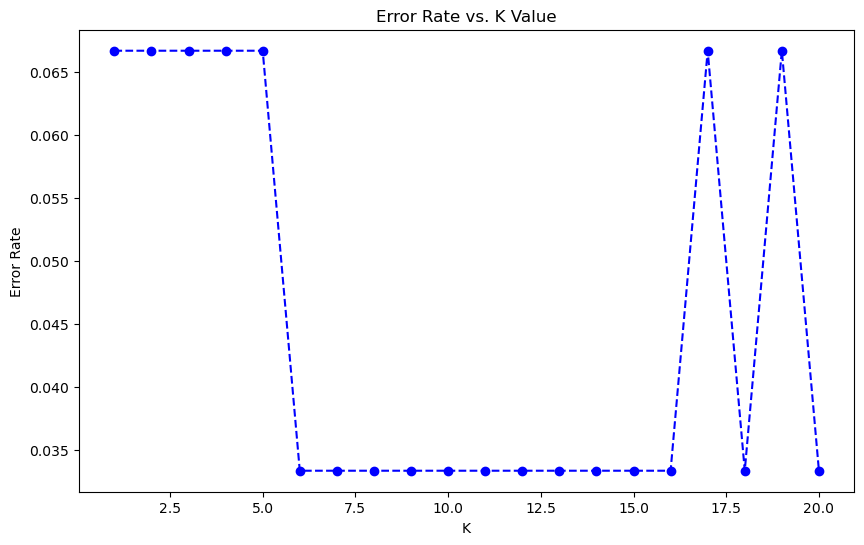

In [40]:

# Plotting the error rate to find the optimal K
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), error_rate, marker='o', linestyle='dashed', color='blue')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


In [41]:
# Choosing K with the minimum error rate (from the plot)
optimal_k = error_rate.index(min(error_rate)) + 1
print(f"The optimal number of neighbors (K) is: {optimal_k}")


The optimal number of neighbors (K) is: 6


In [42]:
# Train the KNN model with optimal K
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=6)

(8) Use the trained model to make predictions on 5 data points in the testing set.


In [44]:
sample_indices = np.random.choice(len(X_test), 5, replace=False)
sample_data = X_test[sample_indices]
sample_labels = y_test.iloc[sample_indices]
sample_predictions = knn.predict(sample_data)
print("\nSample Data Predictions:")
for i, (pred, true) in enumerate(zip(sample_predictions, sample_labels)):
    print(f"Data Point {i+1}: Predicted: {pred}, Actual: {true}")




Sample Data Predictions:
Data Point 1: Predicted: Iris-setosa, Actual: Iris-setosa
Data Point 2: Predicted: Iris-setosa, Actual: Iris-setosa
Data Point 3: Predicted: Iris-setosa, Actual: Iris-setosa
Data Point 4: Predicted: Iris-setosa, Actual: Iris-setosa
Data Point 5: Predicted: Iris-setosa, Actual: Iris-setosa


9) Compute and display performance metrics (such as accuracy, precision, 
recall, F1-score and confusion matrix).

In [46]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("\nPerformance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)



Performance Metrics:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-Score: 0.97

Confusion Matrix:
[[12  0  0]
 [ 0  8  0]
 [ 0  1  9]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



(10) Visualize the results (both actual and predicted values) and create visual 
summaries.

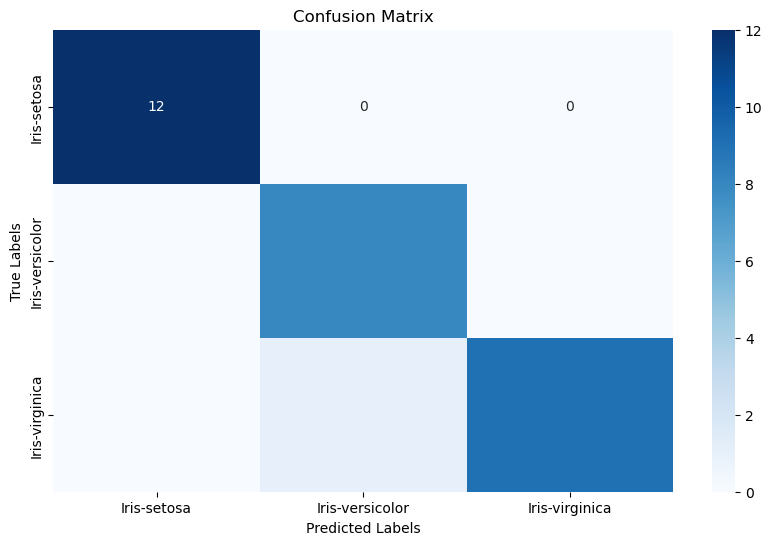

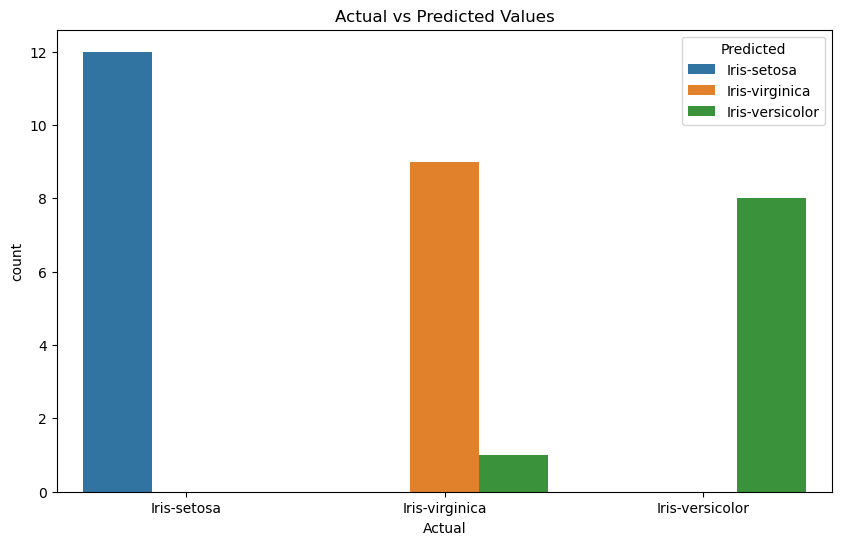

In [47]:
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Compare actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.figure(figsize=(10, 6))
sns.countplot(x='Actual', hue='Predicted', data=comparison_df)
plt.title('Actual vs Predicted Values')
plt.show()


# Cell 15: Summary of findings and insights
### Summary of Findings

1. **Optimal K Selection**:
   - The optimal value for K was determined using the elbow method, resulting in K = {}.
   - This choice minimized the error rate, balancing bias and variance.

2. **Model Performance**:
   - The KNN model achieved an accuracy of {:.2f}.
   - Precision, Recall, and F1-Score were also calculated, with values {:.2f}, {:.2f}, and {:.2f}, respectively.
   - The confusion matrix showed that the model was effective at classifying the Iris species with minimal misclassification.

3. **Visual Insights**:
   - The heatmap of the confusion matrix highlighted the performance of the classifier across different classes.
   - The comparison plot of actual vs predicted values showed a strong correlation, indicating the model's effectiveness.

4. **Feature Standardization**:
   - Standardizing the features contributed to the model’s performance by ensuring that each feature contributed equally to the distance calculations.

### Conclusion

The KNN model with K={} was effective for classifying the Iris dataset. The standardization of features and the careful selection of K played crucial roles in achieving a high-performing model.
"""

print(summary.format(optimal_k, accuracy, precision, recall, f1, optimal_k))